In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


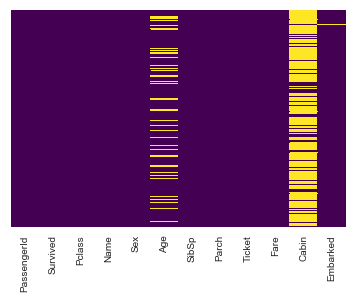

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

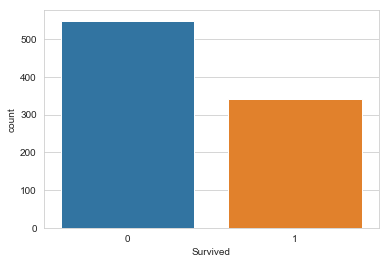

In [5]:
sns.countplot(data=train, x='Survived')

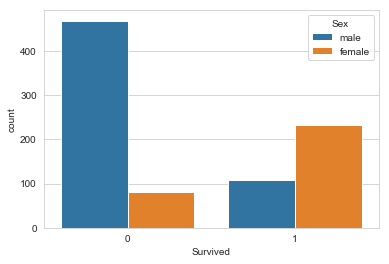

In [6]:
sns.countplot(data=train, x='Survived', hue='Sex')

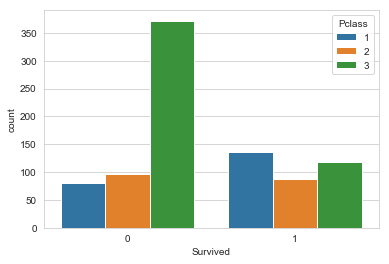

In [7]:
sns.countplot(data=train, x='Survived', hue='Pclass')

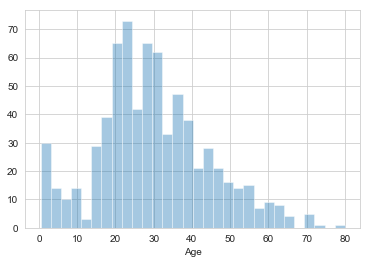

In [8]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


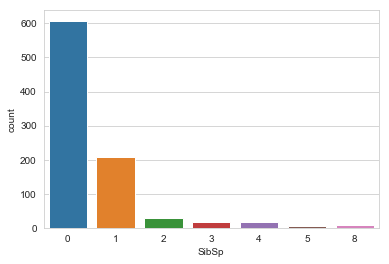

In [10]:
sns.countplot(data=train, x='SibSp')

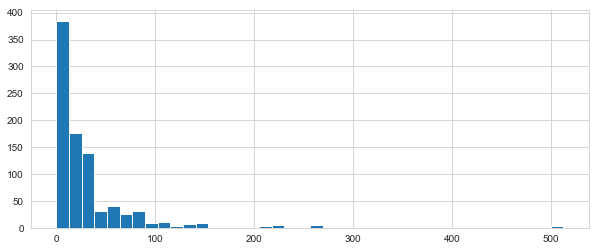

In [11]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [12]:
import cufflinks as cf

In [13]:
cf.go_offline()

In [14]:
#train['Fare'].iplot(kind='hist', bins=50)

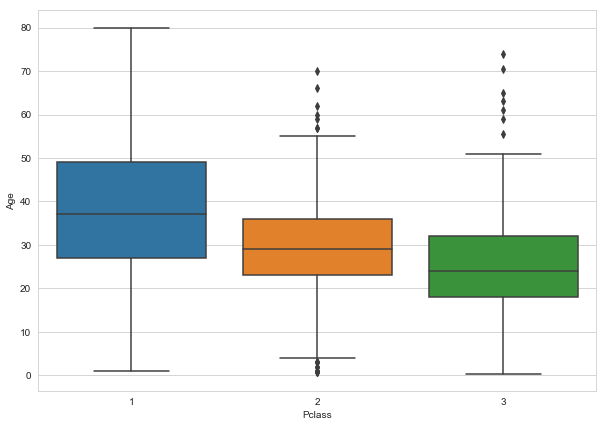

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age',data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

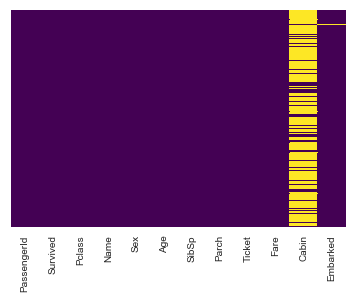

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
train.drop('Cabin', axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [23]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
Pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [25]:
train = pd.concat([train,sex,embark, Pclass], axis=1)

In [26]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [27]:
train.drop(['Sex', 'Embarked','Name', 'Ticket','PassengerId','Pclass'], axis=1, inplace=True)

In [28]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
X_train = train.drop('Survived', axis =1)
y_train = train['Survived']

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
X_test = pd.read_csv('clean_test.csv')
X_test.drop('Ticket', axis=1, inplace = True)

In [47]:
X_test.dropna(inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
Age      417 non-null float64
SibSp    417 non-null int64
Parch    417 non-null int64
Fare     417 non-null float64
2        417 non-null int64
3        417 non-null int64
male     417 non-null int64
Q        417 non-null int64
S        417 non-null int64
dtypes: float64(2), int64(7)
memory usage: 32.6 KB


In [48]:
predictions =  logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

NameError: name 'y_test' is not defined